### 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Loading Dataset

In [2]:
df = pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


### 3. Data Preprocessing

In [4]:
# remove unnecessary Columns

df.drop(['fnlwgt','race','capital-gain','capital-loss'],axis=1,inplace=True)

In [5]:
#drop null values
df.replace('?',np.nan,inplace = True)
df.dropna(inplace=True)

In [6]:
#drop duplicated rows
df.drop_duplicates(inplace=True) 

In [7]:
df.shape

(36811, 11)

In [8]:
df.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,gender,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Male,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,Male,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,Male,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Male,40,United-States,>50K
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,Male,30,United-States,<=50K


In [9]:
df.describe()

,age,educational-num,hours-per-week
count,36811.000000,36811.000000,36811.000000
mean,39.462579,10.115373,41.210535
std,13.409075,2.665255,12.710742
min,17.000000,1.000000,1.000000
25%,29.000000,9.000000,40.000000
50%,38.000000,10.000000,40.000000
75%,48.000000,13.000000,46.000000
max,90.000000,16.000000,99.000000


In [10]:
df['hours-per-week'].value_counts().idxmax()

40

In [11]:
df['hours-per-week'].max()

99

In [12]:
#This will create three unique values for hours-per-week: ‘<40’, ‘40’, and ‘>40’.
bins = [0,39,40,100]
labels = ['<40','40','>40']
df['hours-per-week'] = pd.cut(df['hours-per-week'], bins=bins, labels=labels)

Text(0.5, 1.0, 'Distribution of Age')

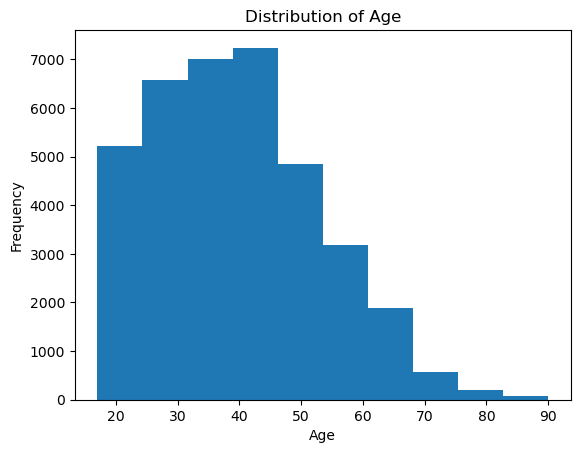

In [13]:
plt.hist(df['age'])
# add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')

Text(0.5, 1.0, 'Distribution of income')

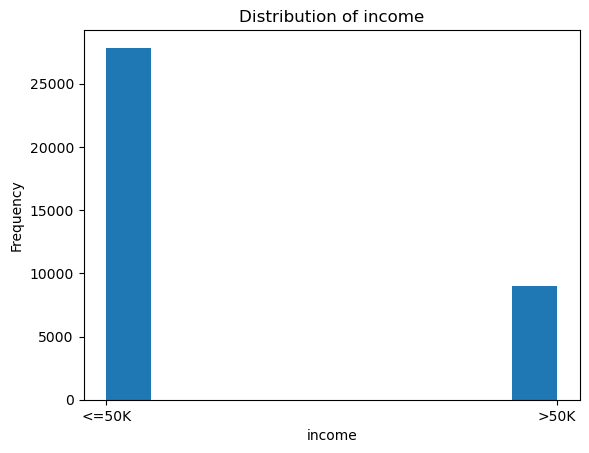

In [14]:
plt.hist(df['income'])
# add labels and title
plt.xlabel('income')
plt.ylabel('Frequency')
plt.title('Distribution of income')

Text(0.5, 1.0, 'Distribution of workclass')

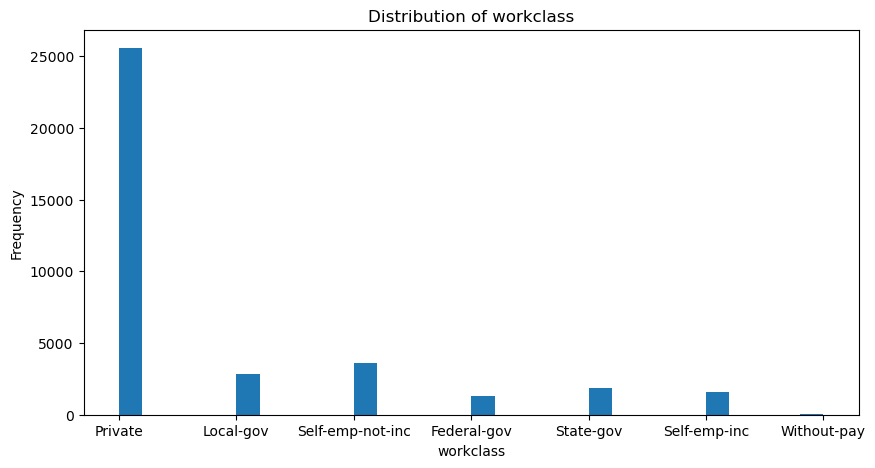

In [15]:
plt.figure(figsize=(10,5))
plt.hist(df['workclass'],bins=30)
# add labels and title
plt.xlabel('workclass')
plt.ylabel('Frequency')
plt.title('Distribution of workclass')

Text(0.5, 1.0, 'Distribution of educational-num')

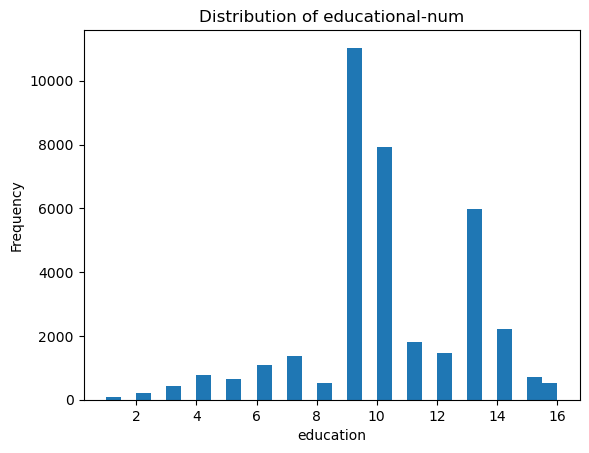

In [16]:
plt.hist(df['educational-num'],bins=30)
# add labels and title
plt.xlabel('education')
plt.ylabel('Frequency')
plt.title('Distribution of educational-num')

Text(0.5, 1.0, 'Distribution of occupation')

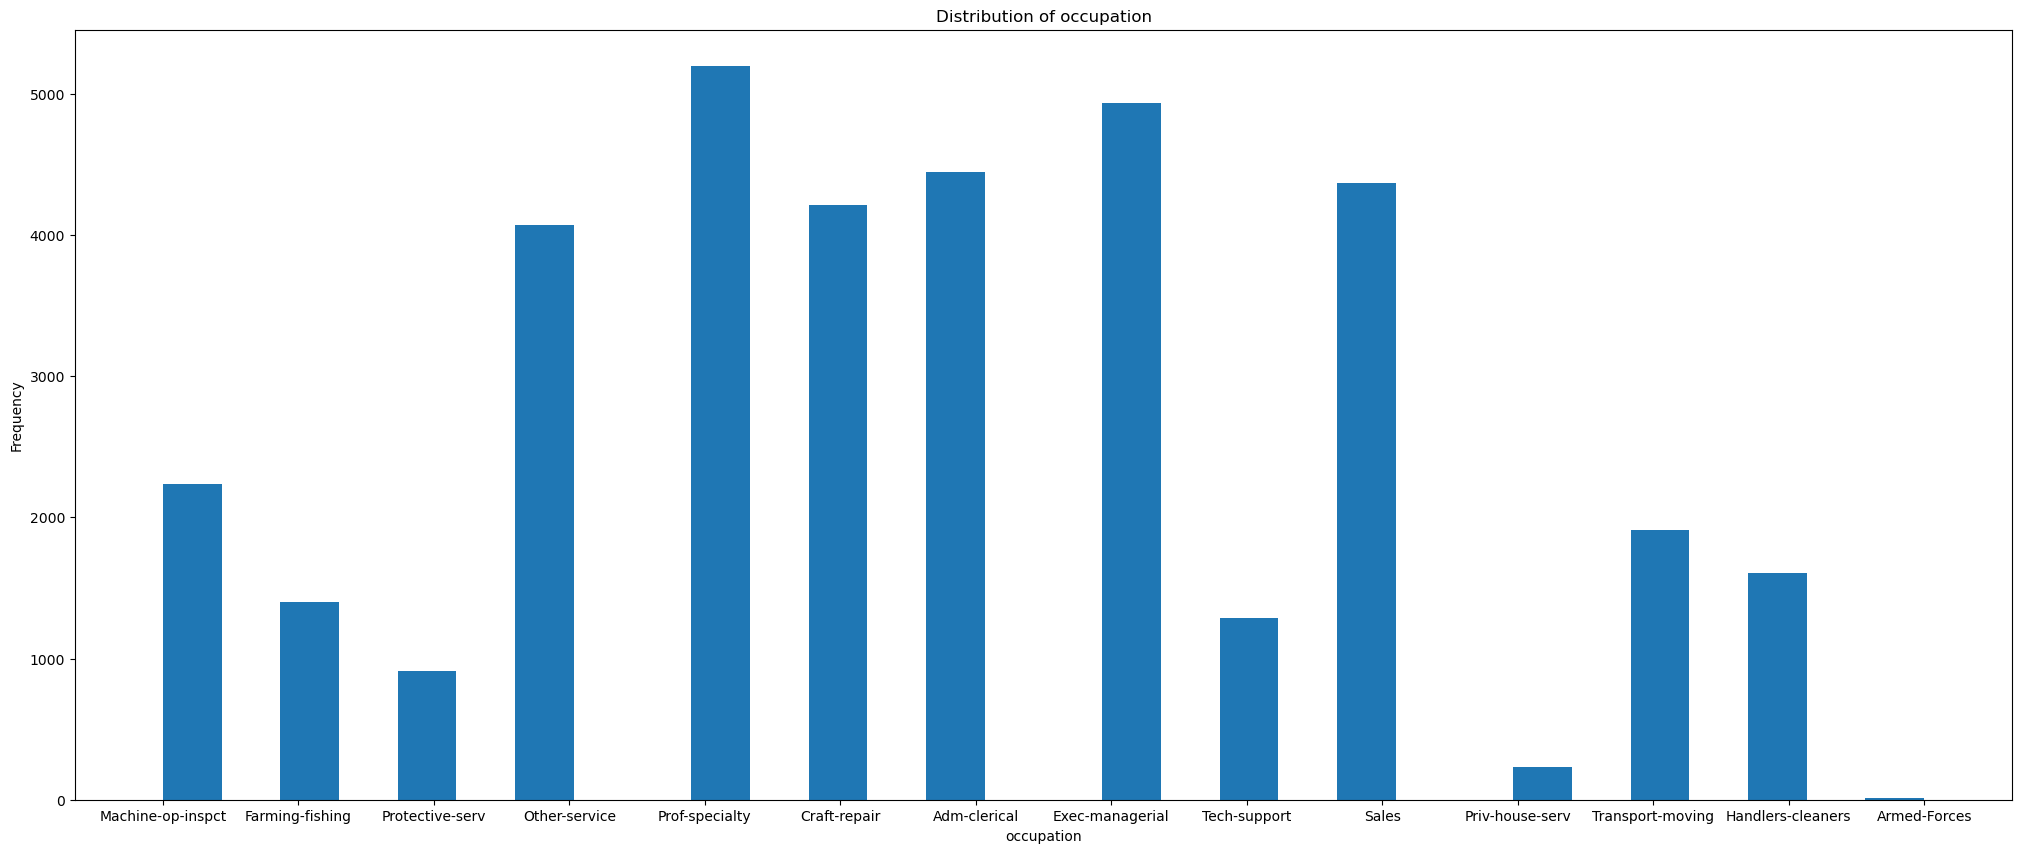

In [17]:
plt.figure(figsize=(25,10))
plt.hist(df['occupation'],bins=30)
# add labels and title
plt.xlabel('occupation')
plt.ylabel('Frequency')
plt.title('Distribution of occupation')

Text(0.5, 1.0, 'Distribution of gender')

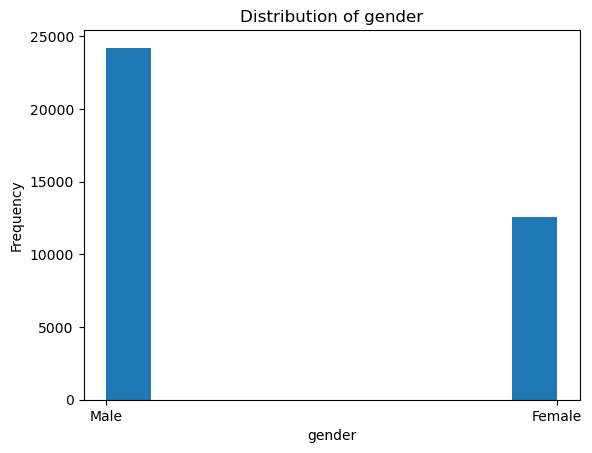

In [18]:
plt.hist(df['gender'])
# add labels and title
plt.xlabel('gender')
plt.ylabel('Frequency')
plt.title('Distribution of gender')

Text(0.5, 1.0, 'Distribution of hours-per-week')

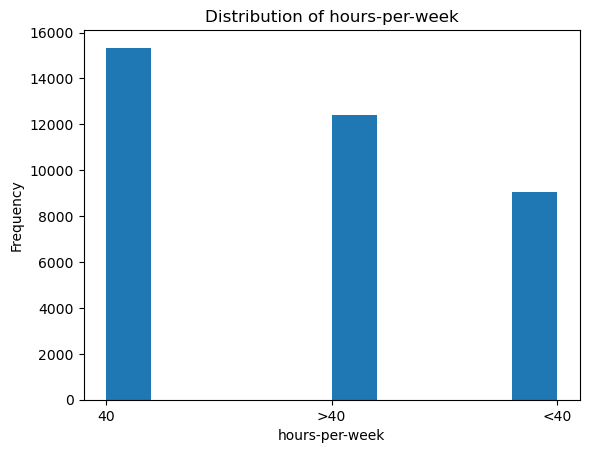

In [19]:
plt.hist(df['hours-per-week'])
# add labels and title
plt.xlabel('hours-per-week')
plt.ylabel('Frequency')
plt.title('Distribution of hours-per-week')

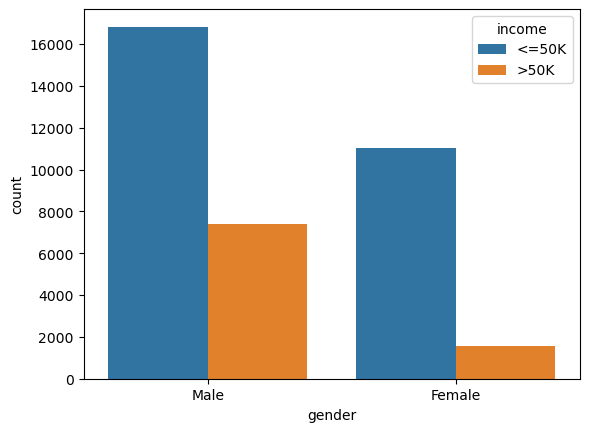

In [20]:
#sns.countplot(x='gender', hue='income', data=df)
sns.countplot(x=df['gender'], hue=df['income'])
plt.show()

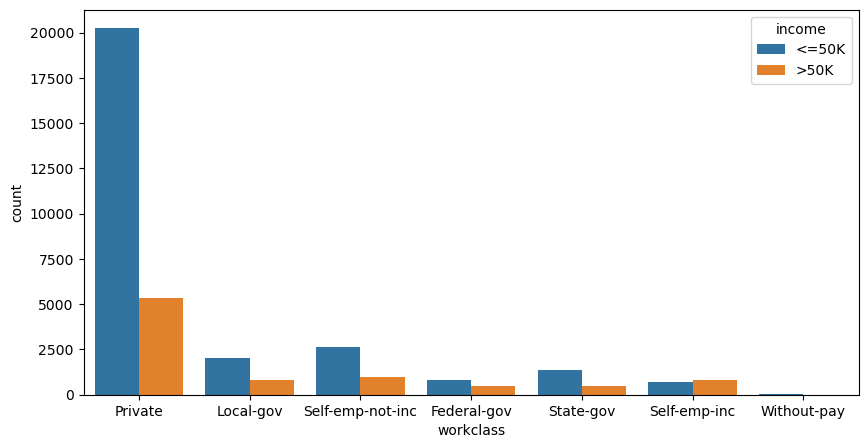

In [21]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['workclass'], hue=df['income'])
plt.show()

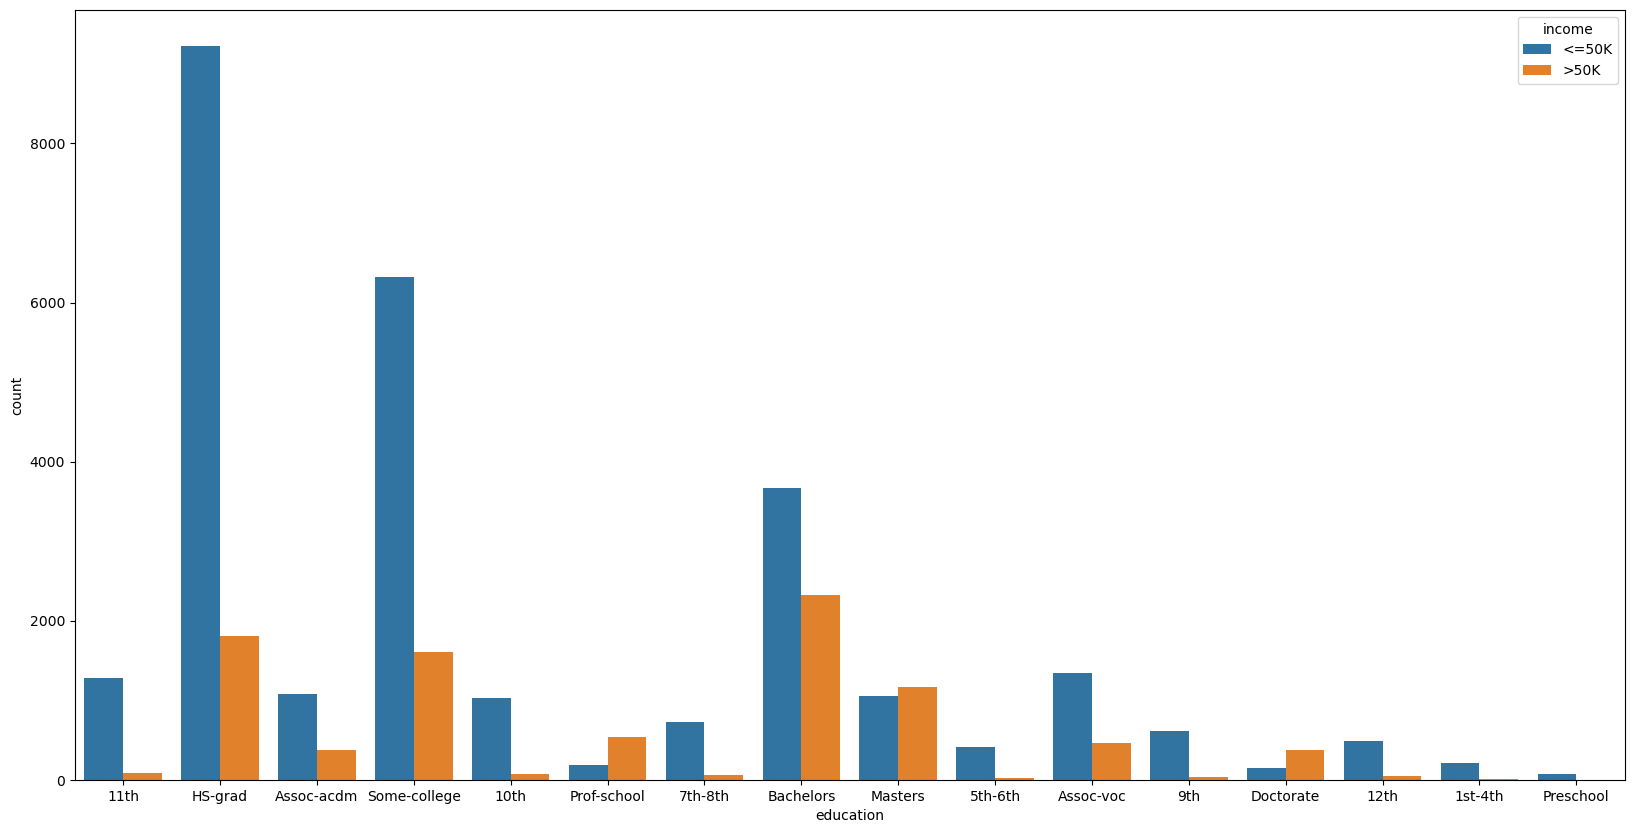

In [22]:
plt.figure(figsize=(20,10))
sns.countplot(x=df['education'], hue=df['income'])
plt.show()

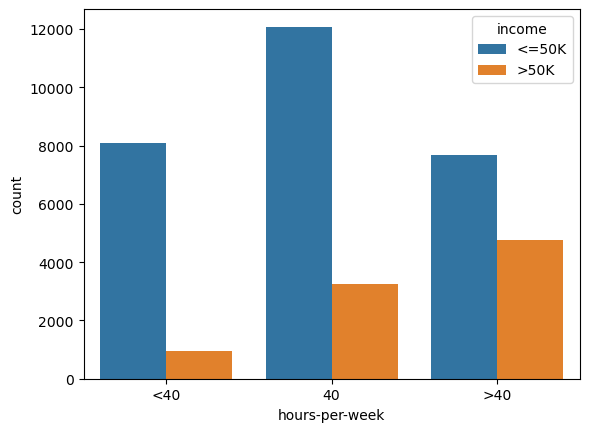

In [23]:
sns.countplot(x=df['hours-per-week'], hue=df['income'])
plt.show()

In [24]:
print('the most common age that earn more than 50k is',
df[df['income'] == '>50K']['age'].value_counts().idxmax())

the most common age that earn more than 50k is 45


In [25]:
print('the most common age that earn less than 50k is',
df[df['income'] == '<=50K']['age'].value_counts().idxmax())

the most common age that earn less than 50k is 23


In [28]:
df['age'].value_counts().idxmax()

1050

In [27]:
df['age'].max()

90

In [29]:
bins = [0,33,91]
labels = ['<=33','>33']
df['age'] = pd.cut(df['age'], bins=bins, labels=labels)

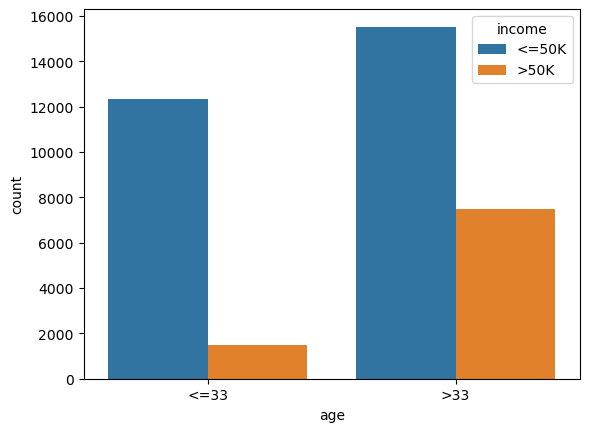

In [31]:
sns.countplot(x=df['age'], hue=df['income'])
plt.show()